# Proyecto práctico

### Importar librerias

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import *
import seaborn as sns
sns.set_theme(
    style='whitegrid',
    context='notebook',
    palette='Set2',
    font_scale=0.8
)

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#import regressors

## Regresión lineal para predecir los gastos médicos de pacientes

In [2]:
df = pd.read_csv('../data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.describe(include='O')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [6]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

## Exploración y preparación de datos

In [7]:
#Dimensión del dataframe
df.shape

(1338, 7)

<AxesSubplot:>

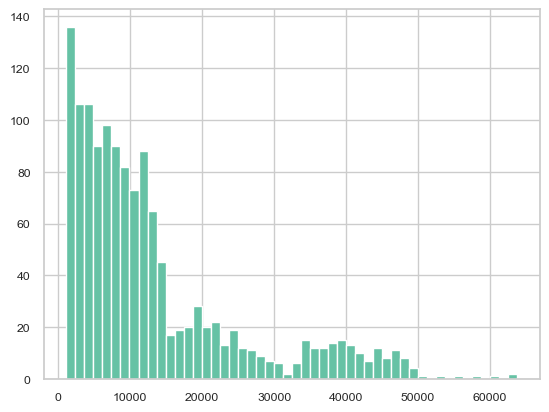

In [8]:
# Histograma de la variable objetivo
df['charges'].hist(bins=50)

In [9]:
df[df['charges'] > 50000]

,age,sex,bmi,children,smoker,region,charges
34,28,male,36.400,1,yes,southwest,51194.55914
543,54,female,47.410,0,yes,southeast,63770.42801
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1146,60,male,32.800,0,yes,southwest,52590.82939
1230,52,male,34.485,3,yes,northwest,60021.39897
1300,45,male,30.360,0,yes,southeast,62592.87309


## Análisis y preparación de datos

In [10]:
# Eliminando los datos atipicos
df = df[df['charges']<50000]
df.reset_index(inplace=True)
df.drop(axis=1, labels='index', inplace=True)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<AxesSubplot:>

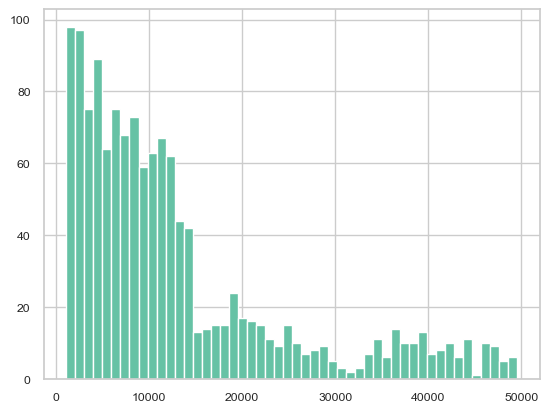

In [11]:
df['charges'].hist(bins=50)

## Análisis de correlación de los datos

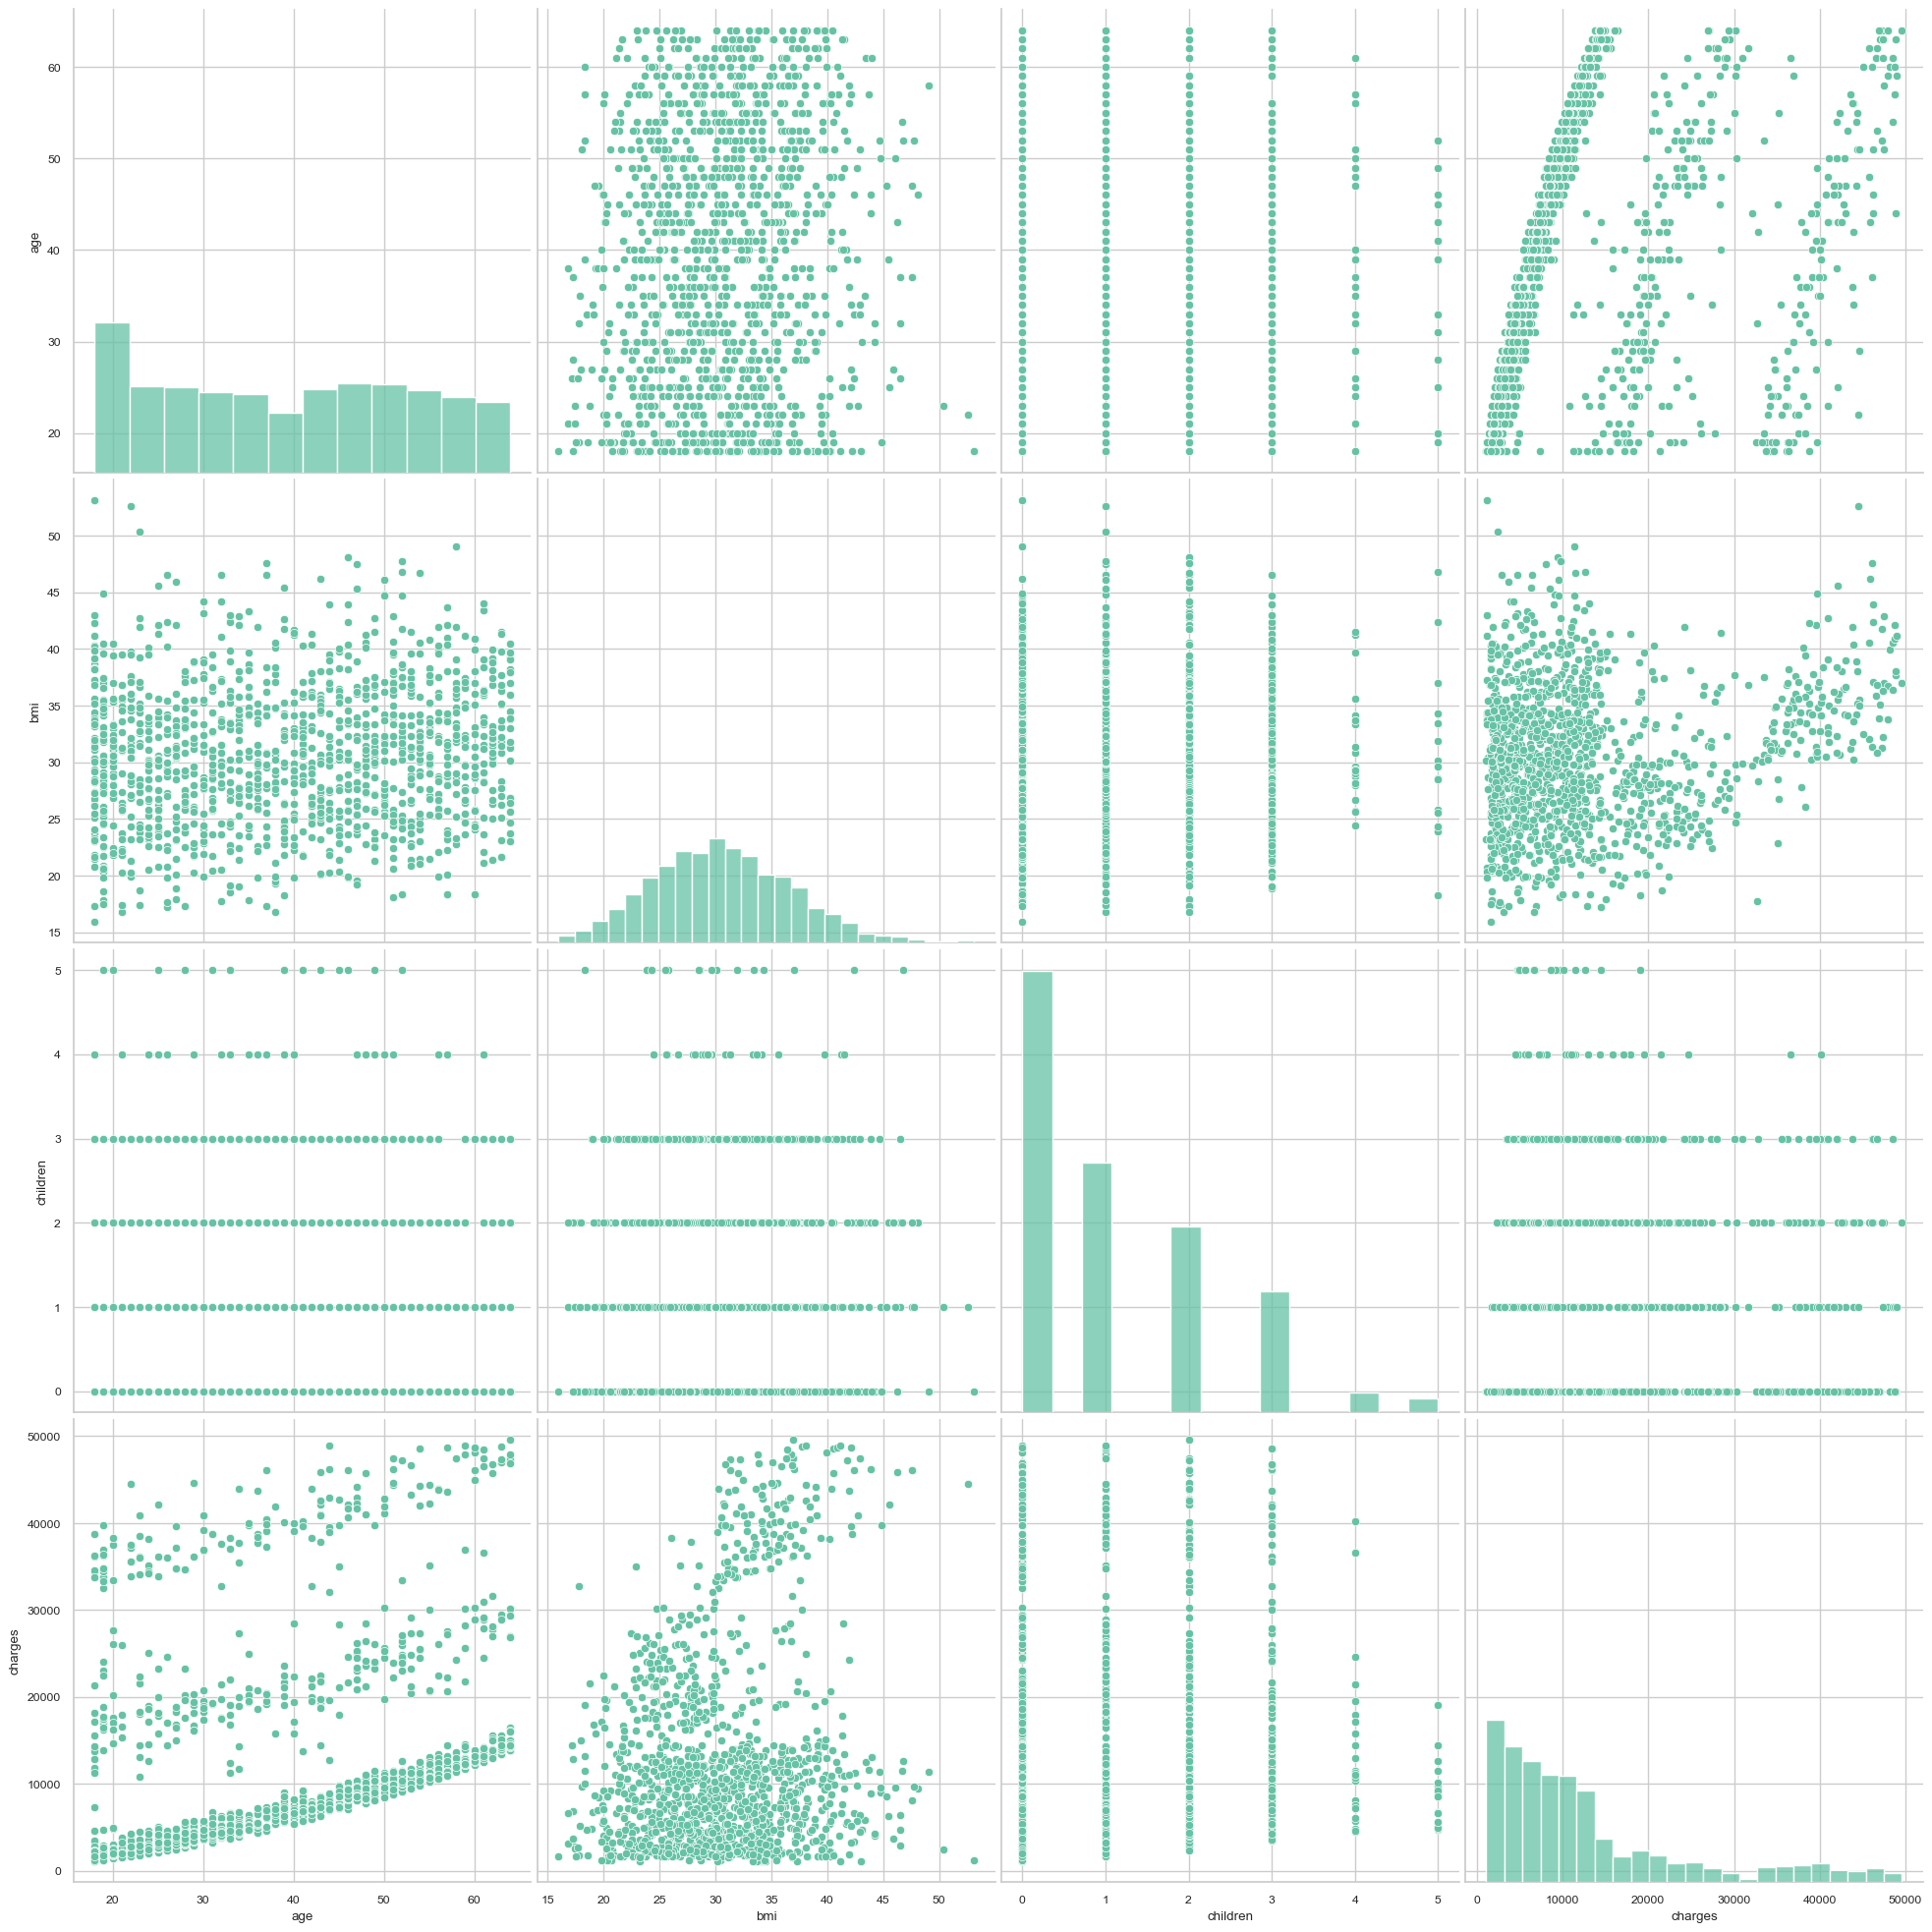

In [12]:
sns.pairplot(data=df, height=5)

<AxesSubplot:>

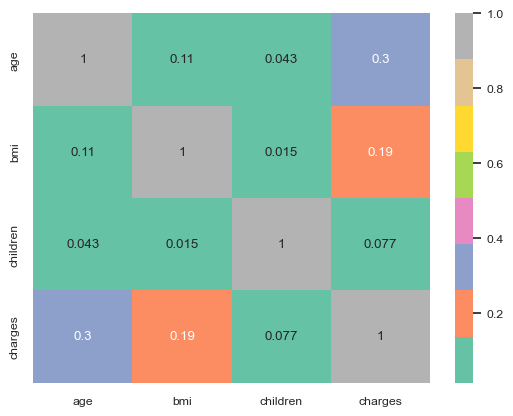

In [13]:
numeric_cols = ['age', 'bmi', 'children', 'charges']
cm = np.corrcoef(df[numeric_cols].values.T)
sns.heatmap(cm, annot=True, cmap='Set2', yticklabels=numeric_cols, xticklabels=numeric_cols)

In [14]:
df_1 = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)
df_1.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


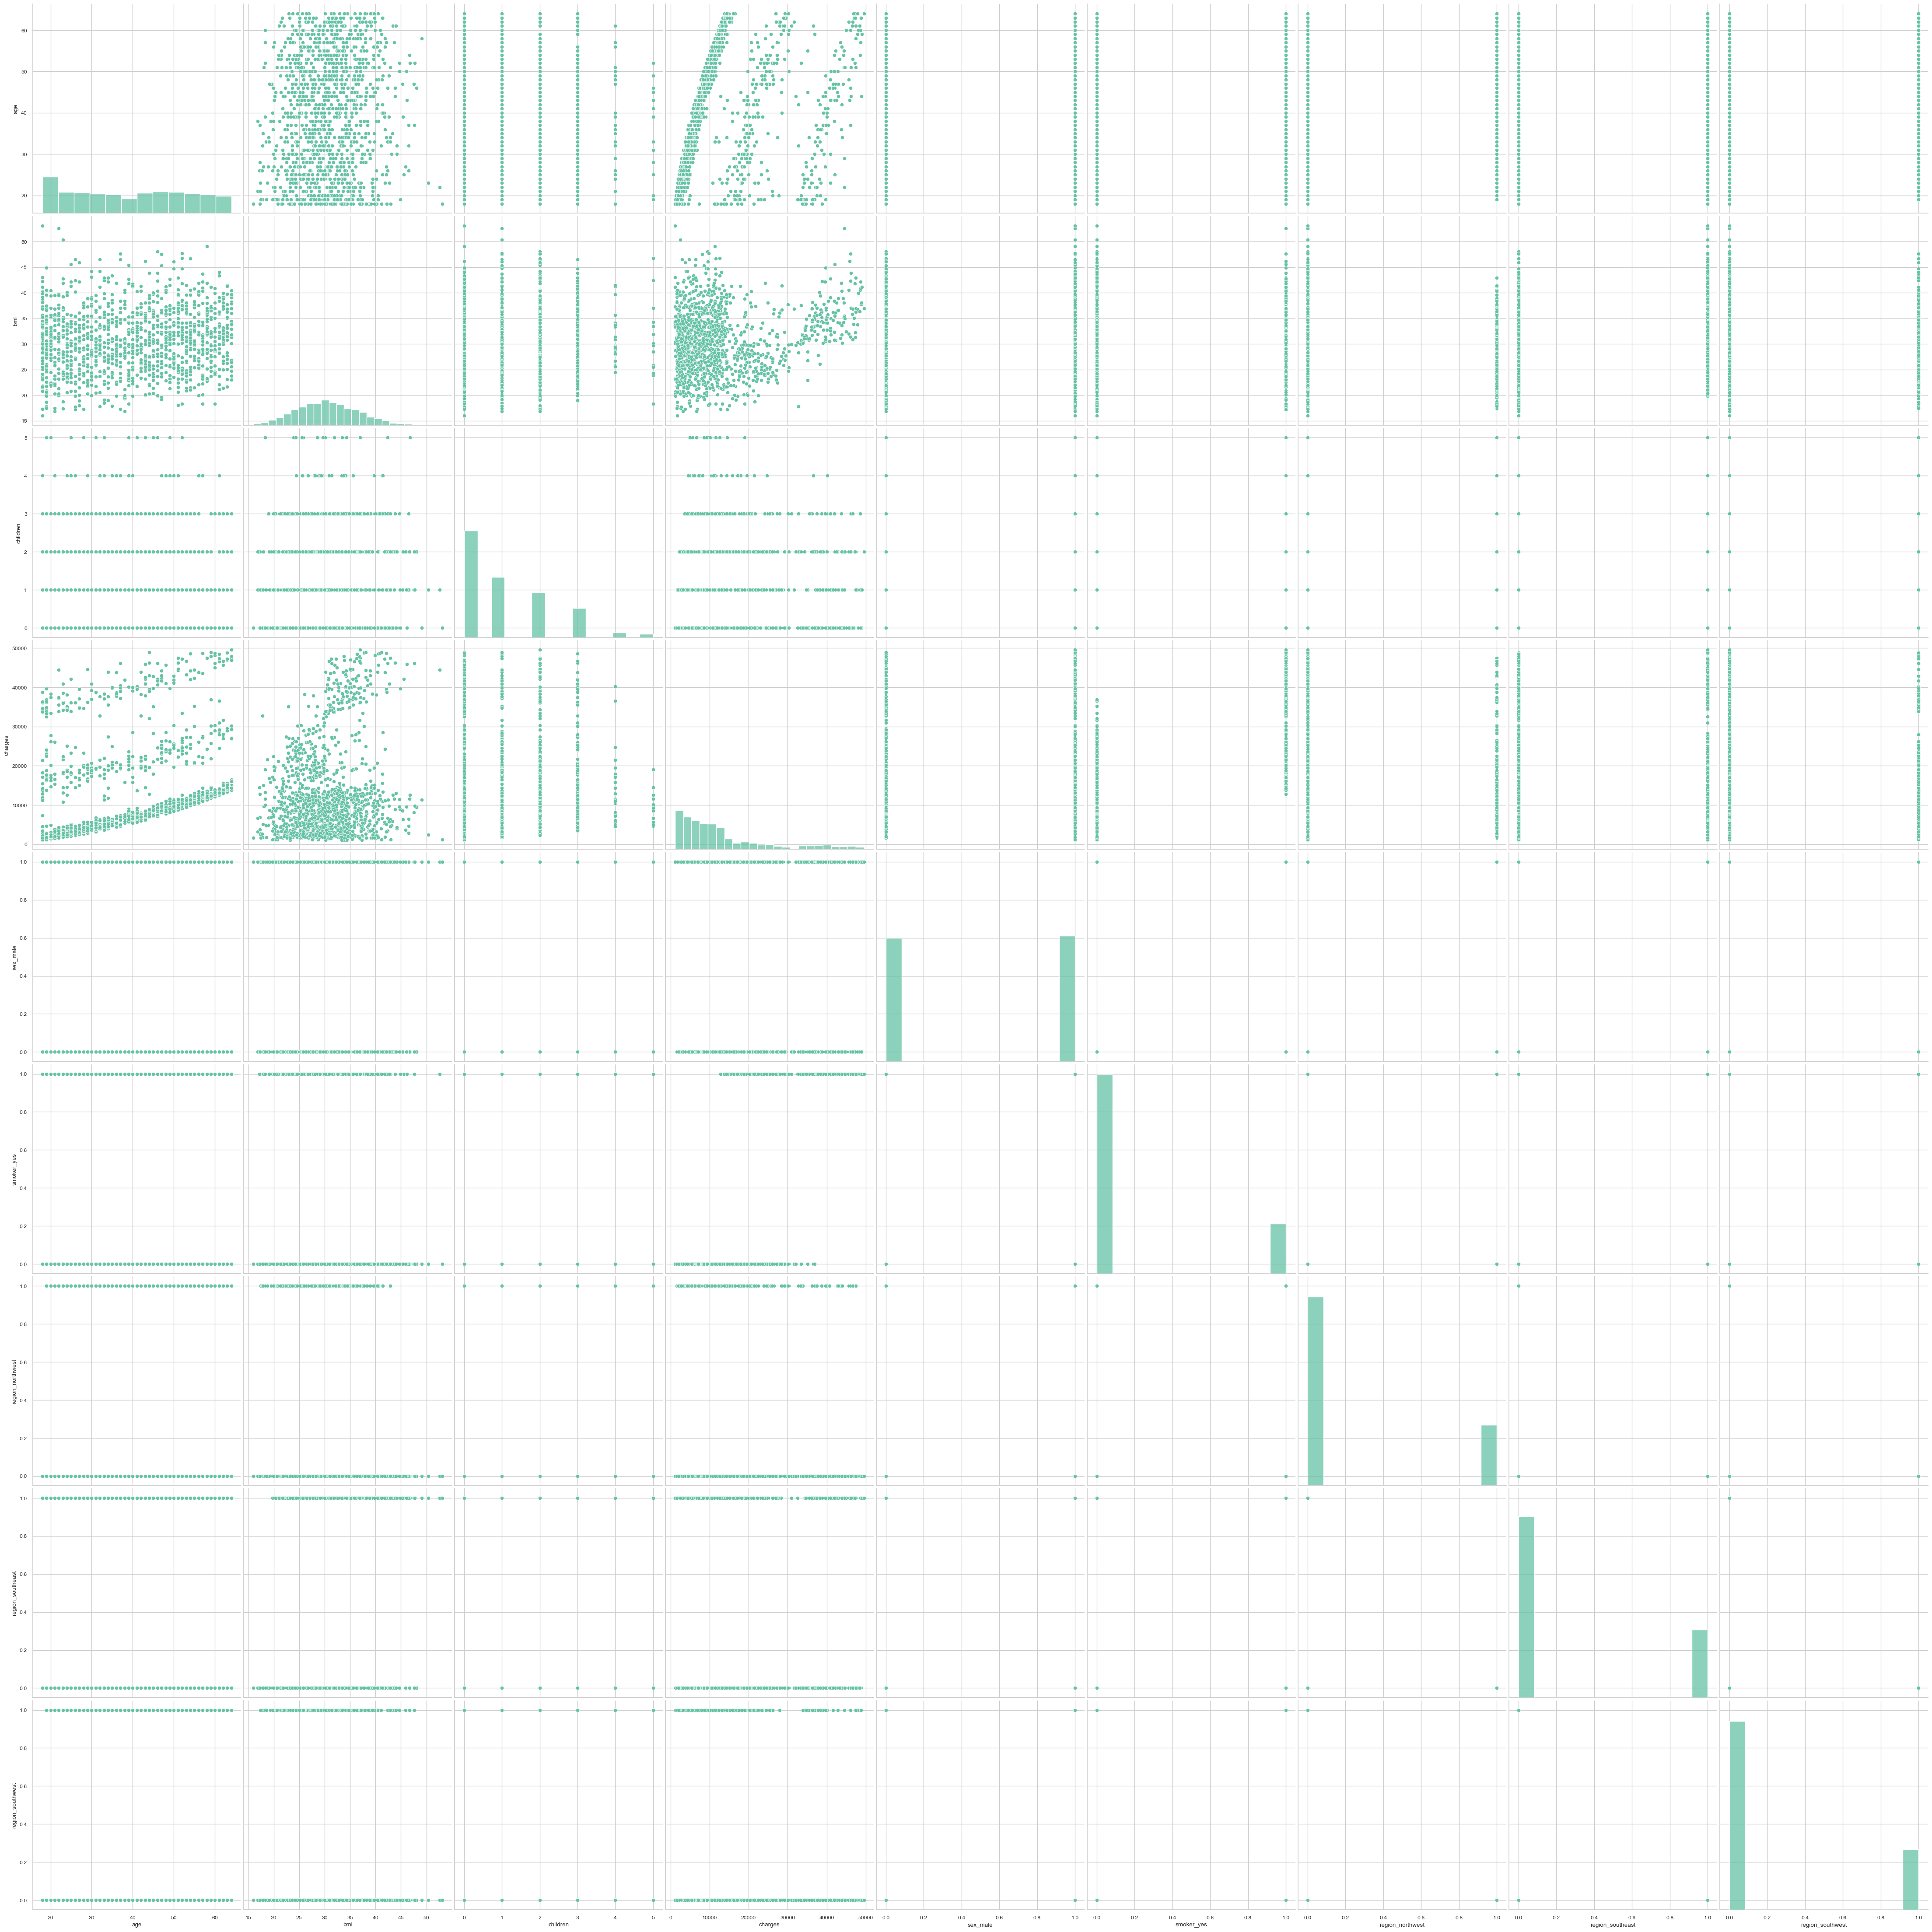

In [15]:
sns.pairplot(data=df_1, height=5)

<AxesSubplot:>

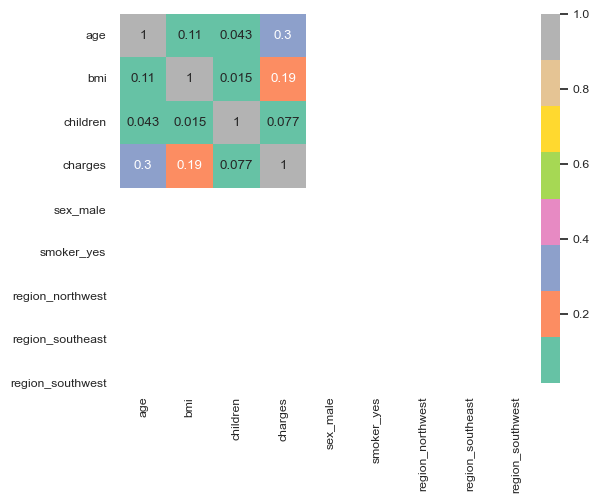

In [16]:
cm_1 = np.corrcoef(df_1.values.T)
sns.heatmap(cm, annot=True, cmap='Set2', yticklabels=df_1.columns, xticklabels=df_1.columns)

## Entrenamiento del modelo

In [17]:
X_cols = list(set(df_1.columns)-set(['charges']))
y_col = ['charges']

X = df_1[X_cols].values
y = df_1[y_col].values

# Dividiendo los datos de entrenamiento y de test
X_train, X_test, y_train, y_test = train_test_split(X,y)

sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [18]:
y_pred.shape

(333, 1)

## Evaluando el modelo

In [19]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('r2: ', r2.round(3))
print('mse: ', mse.round(3))

r2:  0.76
mse:  0.237


## Mejorando el modelo

In [20]:
df_2 = df_1.copy()

In [21]:
df_2['age2'] = df_2['age']**2
df_2['overweight'] = (df_2['bmi'] >= 30).astype(int)
df_2['overweight*smoker'] = df_2['overweight']*df_2['smoker_yes']

In [22]:
df_2.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age2,overweight,overweight*smoker
0,19,27.900,0,16884.92400,0,1,0,0,1,361,0,0
1,18,33.770,1,1725.55230,1,0,0,1,0,324,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0,784,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0,1089,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0,1024,0,0


In [23]:
X_cols = list(set(df_2.columns)-set(['charges']))
y_col = ['charges']

X = df_2[X_cols].values
y = df_2[y_col].values

# Dividiendo los datos de entrenamiento y de test
X_train, X_test, y_train, y_test = train_test_split(X,y)

sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [24]:
y_pred.shape

(333, 1)

In [25]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('r2: ', r2.round(3))
print('mse: ', mse.round(3))

r2:  0.884
mse:  0.121


In [26]:
# Con menos variables
X_cols = ['region_southwest', 'overweight*smoker', 'smoker_yes', 'age2', 'children']
y_col = ['charges']

X = df_2[X_cols].values
y = df_2[y_col].values

# Dividiendo los datos de entrenamiento y de test
X_train, X_test, y_train, y_test = train_test_split(X,y)

sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [27]:
y_pred.shape

(333, 1)

In [28]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('r2: ', r2.round(3))
print('mse: ', mse.round(3))

r2:  0.82
mse:  0.178


In [29]:
# Con menos variables
X_cols = ['overweight*smoker', 'smoker_yes', 'age2', 'children']
y_col = ['charges']

X = df_2[X_cols].values
y = df_2[y_col].values

# Dividiendo los datos de entrenamiento y de test
X_train, X_test, y_train, y_test = train_test_split(X,y)

sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [30]:
y_pred.shape

(333, 1)

In [31]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('r2: ', r2.round(3))
print('mse: ', mse.round(3))

r2:  0.862
mse:  0.131
